### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [4]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [5]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [6]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [7]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [8]:
# Concatenate Chicago, Washington and New York City data to allow for analysis on all three
# Since Washington doesn't have columns for Birth.Year and Gender we create columns filled with null values for them

wash$Gender <- NA
wash$Birth.Year <- NA

In [9]:
# Add a new column City to each dataset to display the city and concatenate the dataset
ny$City <- 'New York'
wash$City <- 'Washington'
chi$City <- 'Chicago'

city <- rbind(ny,wash)
city <- rbind(city, chi)

head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


### Question 1

**What is the travel time in the three cities on average**

In [10]:
# Total users in each city
city_total = table(city$City)
city_total

# Percentage of users in each City
percent =round((city_total / sum(city_total) * 100), digits = 2)
percent


   Chicago   New York Washington 
      8630      54770      89051 


   Chicago   New York Washington 
      5.66      35.93      58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

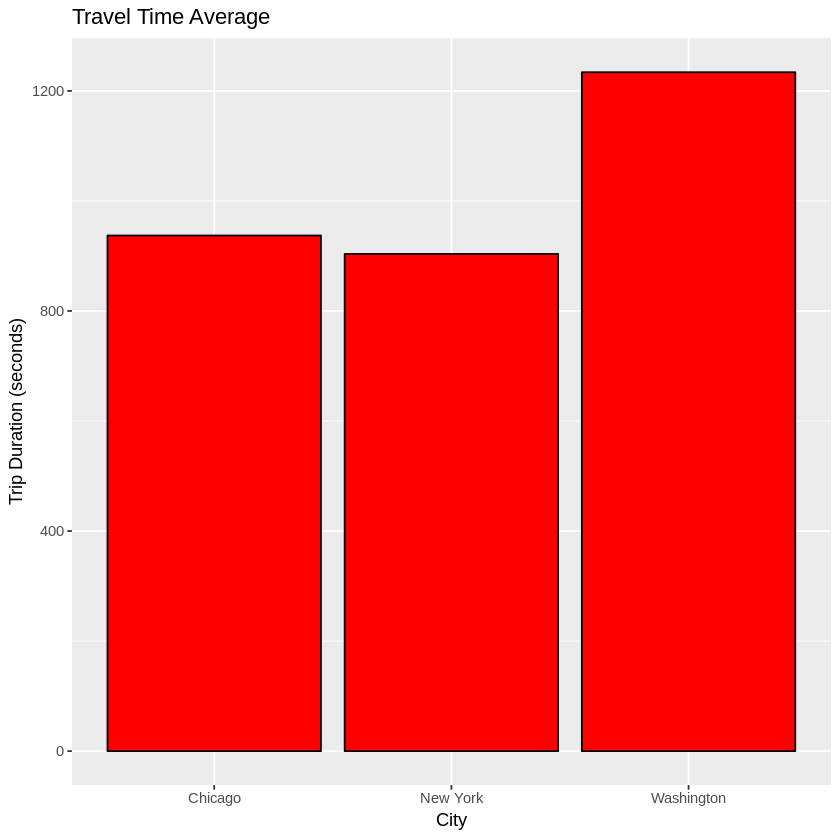

In [11]:
# Visualisation with ggplot2
library(ggplot2)
ggplot(aes(x = City, y = Trip.Duration), data = city) + 
geom_bar(position = 'dodge', stat = 'summary', fun.y = 'mean', fill = 'red', colour = 'black') + 
ggtitle('Travel Time Average') + 
labs(x = 'City', y = 'Trip Duration (seconds)')


### **Summary of your question 1 results goes here.**

- Washington with a total of 89,051 riders account for more than half (approximately 58.41%) the total number of users accross the 3 cities
- Chicago wth a percentage of approximately 5.66 of total riders accounts for the least rentals across the cities
- It is instructive to note however that the travel time for Chicago and New York (which account for approximatimely 35.93% of total rides) do not vary much at approximately 930 and 900 seconds on the average.
- Riders travel more and for longer (above 1200 seconds) on our bikes in Washington than any of the two other cities

### Question 2

**Which gender travels more on our bikes in the cities of New York and Chicago (since there is no data on gender for Washington).**

In [12]:
# Concatenate New York and Chicago datasets
city1 = rbind(ny, chi)
city1

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York
1675753,2017-03-06 16:22:53,2017-03-06 16:30:51,478,Front St & Gold St,Lafayette Ave & Fort Greene Pl,Subscriber,Male,1982,New York
1692245,2017-03-07 07:42:24,2017-03-07 08:49:42,4038,E 89 St & York Ave,Broadway & Battery Pl,Subscriber,Male,1984,New York
2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,,NA,New York
1558339,2017-03-01 23:01:31,2017-03-01 23:06:41,309,E 3 St & 1 Ave,E 25 St & 2 Ave,Subscriber,Male,1992,New York


In [13]:
# Total Count of Females and Males
count = table(city1$Gender)
count

# Percentage of Females and Males
percent = round((count / length(city1$Gender) * 100), digits = 2)
percent


       Female   Male 
  7158  13882  42360 


       Female   Male 
 11.29  21.90  66.81 

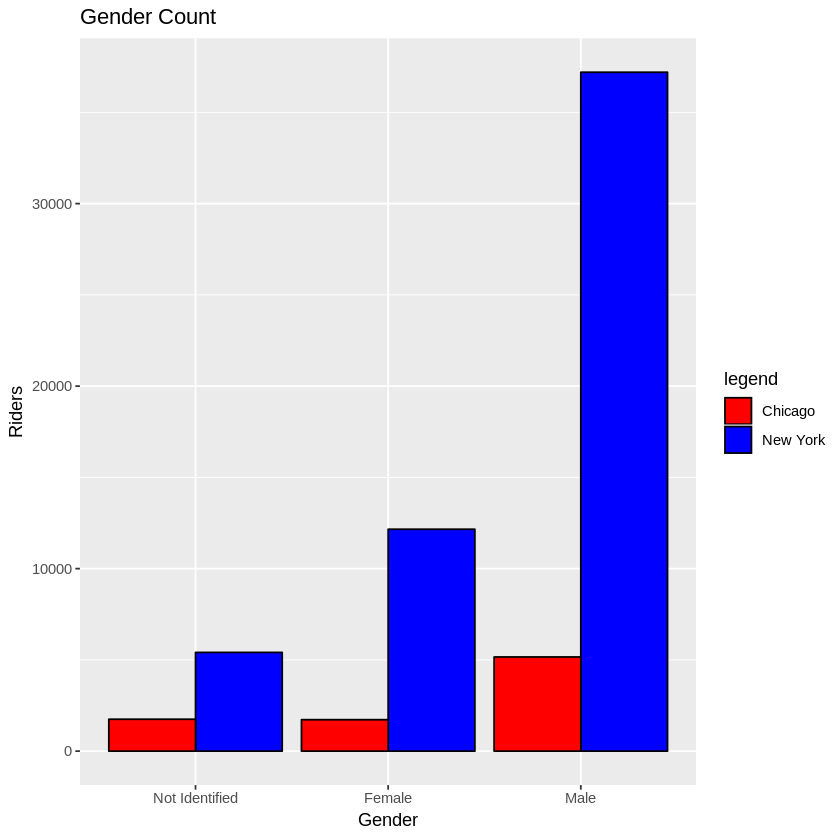

In [14]:
# Visualisation with ggplot2
ggplot(aes(x = Gender, fill = City), data = city1) + 
geom_bar(position = 'dodge', colour = 'black') + 
scale_x_discrete(labels = c('Not Identified', 'Female', 'Male')) + 
ggtitle('Gender Count') + 
labs(x = 'Gender', y = 'Riders') + 
scale_fill_manual('legend', values = c('New York' = 'blue', 'Chicago' = 'red'))


In [15]:
# Distribution count of users by Gender in Chicago
chi_count = table(city1$Gender[city1$City == 'Chicago'])
chi_count

# Percentge Distribution of users by Gender in Chicago
percent = round((chi_count / length(city1$Gender[city1$City == 'Chicago']) * 100), digits = 2)
percent


       Female   Male 
  1748   1723   5159 


       Female   Male 
 20.25  19.97  59.78 

In [16]:
# Distribution count of users by Gender in Chicago
ny_count = table(city1$Gender[city1$City == 'New York'])
ny_count

# Percentge Distribution of users by Gender in Chicago
percent = round((ny_count / length(city1$Gender[city1$City == 'New York']) * 100), digits = 2)
percent


       Female   Male 
  5410  12159  37201 


       Female   Male 
  9.88  22.20  67.92 

**Summary of your question 2 results goes here.**

- There are more males than females and not identified riders across the two cities of New York and Chicago
- Male riders account for approximately 66.81% of total riders in both cities
- Males also account for a siginificant proportion of riders in New York (67.92%)

### Question 3

**What is the Peak Rental Month.**

In [17]:
# Reformat date to make it readable
library(lubridate)

city$Start.Time <- ymd_hms(city$Start.Time)
city$End.Time <- ymd_hms(city$End.Time)

Warning message:
“ 1 failed to parse.”

In [18]:
# Create new column City 
city$Month <- month(city$Start.Time)
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York,6
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York,5
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York,3
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York,5
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York,6
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York,2


Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

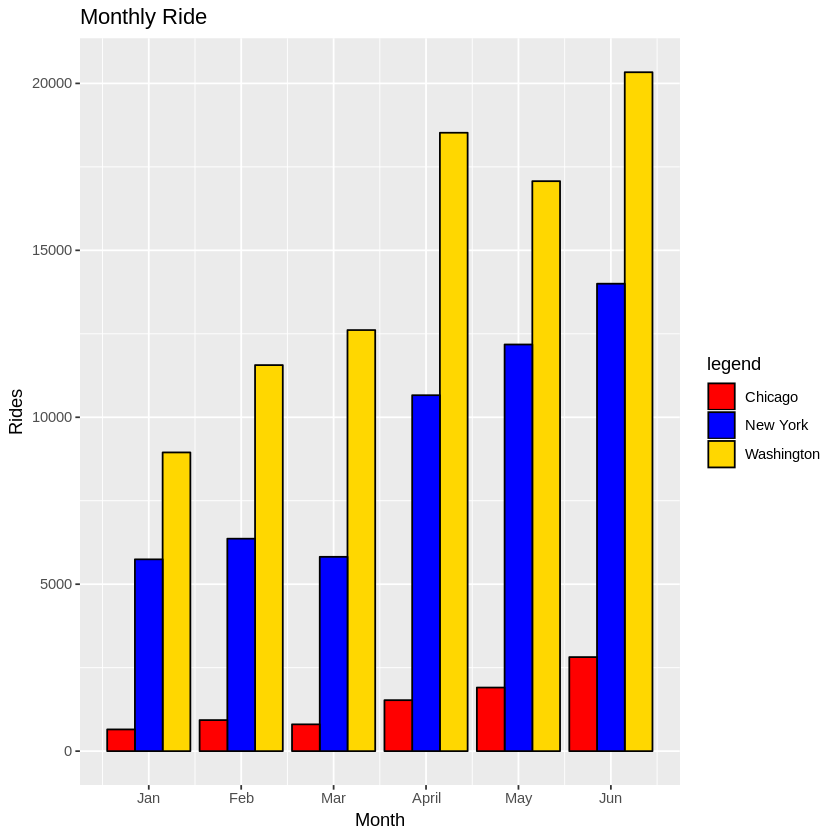

In [19]:
# Visualisation with ggplot2
ggplot(aes(x = Month, fill = City), data = city) + 
geom_bar(position = 'dodge', colour = 'black') + 
scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'April', 'May', 'Jun')) + 
ggtitle('Monthly Ride') + 
labs(x = 'Month', y = 'Rides') + 
scale_fill_manual('legend', values = c('Chicago' = 'red', 'New York' = 'blue', 'Washington' = 'gold'))

In [29]:
# To help with cross tabulation
source("http://pcwww.liv.ac.uk/~william/R/crosstab.r")

In [30]:
# Total users by month across all three cities
crosstab(city, row.vars = 'Month')

     
Month     Count   Total %
  1    15341.00     10.06
  2    18857.00     12.37
  3    19235.00     12.62
  4    30709.00     20.14
  5    31157.00     20.44
  6    37151.00     24.37
  Sum 152450.00    100.00

In [31]:
# Total users by month via City
crosstab(city, row.vars = 'Month', col.vars = 'City')

      City Chicago New York Washington    Sum
Month                                        
1              650     5745       8946  15341
2              930     6364      11563  18857
3              803     5820      12612  19235
4             1526    10661      18522  30709
5             1905    12180      17072  31157
6             2816    14000      20335  37151
Sum           8630    54770      89050 152450

In [32]:
# Percentage of users by month via City
crosstab(city, row.vars = 'Month', col.vars = 'City', type = 'r')

      City Chicago New York Washington    Sum
Month                                        
1             4.24    37.45      58.31 100.00
2             4.93    33.75      61.32 100.00
3             4.17    30.26      65.57 100.00
4             4.97    34.72      60.31 100.00
5             6.11    39.09      54.79 100.00
6             7.58    37.68      54.74 100.00

**Summary of your question 3 results goes here.**
- The peak month for our riders is in June (summer time) as this accounts for approximately 24.32% of totals rides across all cities for the 6 month period. this is followed by motn of May at 20.44%
- The downtime for our riders is in January (10.06%). It is assumed this is due to the wintery weather conditions
- Washington accounts for the bulk of our customers across all 3 cities in the 6 month period. This followed by New York and then Chicago in that order


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [33]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')